# Ultimate Take Home Challenge

In [1]:
#Import Packages
import json
import pandas as pd
import datetime
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Part 1: Exploratory Data Analysis**

In [113]:
#Import logins file
with open('logins.json') as f:
  data = json.load(f)

In [4]:
#Convert file to dataframe
df = pd.DataFrame(data)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
#Convert "login_time" column to datetime
df['login_time'] = pd.to_datetime(df['login_time'])

In [6]:
#Check data type of "login_time" column
df.dtypes

login_time    datetime64[ns]
dtype: object

In [7]:
#Sort dataframe by "login_time" column.
df = df.sort_values(by='login_time')

In [8]:
df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [9]:
#Reset index of dataframe
df.reset_index(drop=True, inplace=True)

In [10]:
#Check index to view index type
df.index

RangeIndex(start=0, stop=93142, step=1)

In [12]:
df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [13]:
#Create time column
df['time'] = df['login_time'].map(lambda x: x.strftime('%H:%M:%S'))

In [14]:
#create date column in case needed
df['date'] = df['login_time'].map(lambda x: x.strftime('%Y-%m-%d'))

In [15]:
#Drop "login_time" column
df = df.drop(columns='login_time')

In [16]:
#Sort dataframe by "time" column
df = df.sort_values(by='time')

In [17]:
#Convert "time" column to datetime
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

In [18]:
#Convert date time to datetime
df['date'] = pd.to_datetime(df['date'])

In [19]:
df.head()

,time,date
37722,1900-01-01 00:00:00,1970-02-21
32454,1900-01-01 00:00:00,1970-02-15
42648,1900-01-01 00:00:02,1970-02-26
91338,1900-01-01 00:00:02,1970-04-12
28785,1900-01-01 00:00:04,1970-02-11


In [20]:
#Set index to "time" column
df = df.set_index(pd.to_datetime(df['time']))

In [21]:
df.head()

,time,date
time,,
1900-01-01 00:00:00,1900-01-01 00:00:00,1970-02-21
1900-01-01 00:00:00,1900-01-01 00:00:00,1970-02-15
1900-01-01 00:00:02,1900-01-01 00:00:02,1970-02-26
1900-01-01 00:00:02,1900-01-01 00:00:02,1970-04-12
1900-01-01 00:00:04,1900-01-01 00:00:04,1970-02-11


In [22]:
#Create "count" column for aggregation purposes
df['count'] = 1

In [23]:
#Resample time column into 15 minute bins and count occurances for each bin in the "count" column
df = df.resample("15T").agg({'count':'sum'})

In [24]:
#Reset index
df = df.reset_index()

In [25]:
df.head(105)

,time,count
0,1900-01-01 00:00:00,1439
1,1900-01-01 00:15:00,1547
2,1900-01-01 00:30:00,1525
3,1900-01-01 00:45:00,1482
4,1900-01-01 01:00:00,1549
...,...,...
91,1900-01-01 22:45:00,1637
92,1900-01-01 23:00:00,1573
93,1900-01-01 23:15:00,1552
94,1900-01-01 23:30:00,1456


In [28]:
#Strip placeholder date from "time" column
df['time'] = [str(x)[11:] for x in df['time']]

In [29]:
df.head()

,time,count
0,00:00:00,1439
1,00:15:00,1547
2,00:30:00,1525
3,00:45:00,1482
4,01:00:00,1549


In [30]:
#Create list of times for x-ticks
time_l = list(df['time'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


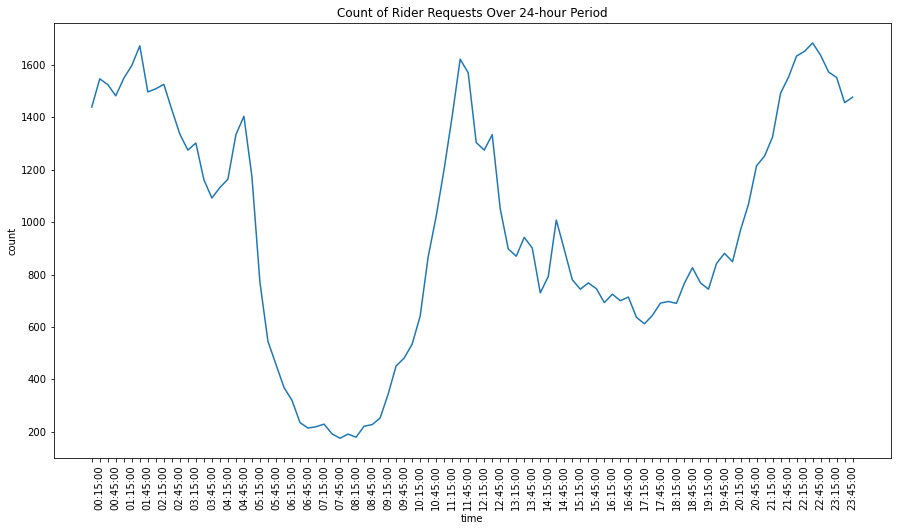

In [127]:
#Plot counts for each 15 minute bin over a 424 hour period
plt.figure(figsize=(15,8))
g = sns.lineplot(x='time', y='count', data=df)
g.set_xticklabels(time_l, rotation=90)
plt.title('Count of Rider Requests Over 24-hour Period')
print(plt.setp(g.get_xticklabels()[::2], visible=False))

There appears to be a significant decline in the number of requests which occurs at about 05:00:00 and reaches minimum demand at around 07:45:00. At about 08:15:00, another demand cycle begins and reaches its peak value at 11:30:00. After this peak, this demand cycle ends and reaches a minimum value of about 600 requests at 17:15:00. A new demand cycle begins after this minimum and continues into the next day. 18804/49992 riders were retained (see In [52]).

**Part 2: Experiment and Metrics Design**

1) As a key measure of success for this experiment, I would use the proportion of drivers who have accepted trips in both cities vs those who were exclusie to one. If the proportion increasees in favor of those who have driven in both cities, it would mean relatively fewer drivers were exclusive, and thus, a successful experiment. 

2) a practical experiment would be to create a push notification that would notify partners that their bridge toll costs would be reimbursed. If more drivers are aware of this, they would no longer have concerns with being tolled and would be more likely to drive in both cities. To test the significance, I would start with two groups: those who received the notification and those who did not. I would then conduct a chi-square test for independence with the research question, "Is there a relationship between being shown the notification and partners driving exclusively in their respective cities?". If there is a p-value < .05, then it would mean that there is significant evidence that being shown a notification informing partners about toll reimbursment makes them less likely to drive exclusively in their respective cities. 

**Part 3: Predictive Modeling**

In [32]:
#Load data and convert to dataframe
with open('ultimate_data_challenge.json') as f:
  data = json.load(f)

df2 = pd.DataFrame(data)
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [33]:
#Get dataframe shape
df2.shape

(50000, 12)

In [34]:
#Get data types
df2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [35]:
#Count unique values per column
df2.nunique()

city                         3
trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        37
avg_surge                  115
last_trip_date             182
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        27
dtype: int64

In [36]:
#Get duplicate row count
duplicate_rows_df = df2[df2.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (8, 12)


In [37]:
#Show value counts before dropping duplicates
df2.count()

city                      50000
trips_in_first_30_days    50000
signup_date               50000
avg_rating_of_driver      41878
avg_surge                 50000
last_trip_date            50000
phone                     49604
surge_pct                 50000
ultimate_black_user       50000
weekday_pct               50000
avg_dist                  50000
avg_rating_by_driver      49799
dtype: int64

In [38]:
df2 = df2.drop_duplicates()
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [39]:
#Value counts after dropping duplicates
df2.count()

city                      49992
trips_in_first_30_days    49992
signup_date               49992
avg_rating_of_driver      41873
avg_surge                 49992
last_trip_date            49992
phone                     49596
surge_pct                 49992
ultimate_black_user       49992
weekday_pct               49992
avg_dist                  49992
avg_rating_by_driver      49791
dtype: int64

In [40]:
#Get null value counts per column
print(df2.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8119
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


<AxesSubplot:xlabel='avg_rating_of_driver'>

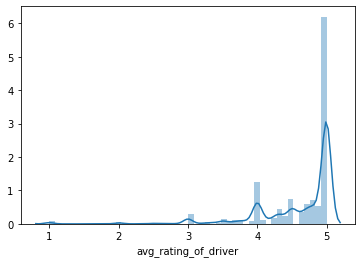

In [41]:
#Show distribution of values for the "avg_rating_of_driver" and "avg_rating_by_driver" columns.
#If distrivution is skewed, use median to fill null values or else use mean.
sns.distplot(df2['avg_rating_of_driver'])

<AxesSubplot:xlabel='avg_rating_by_driver'>

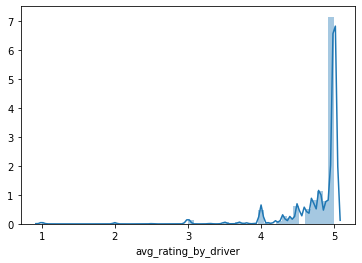

In [42]:
sns.distplot(df2['avg_rating_by_driver'])

In [43]:
#Because distributions are skewed, use medians
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].median())
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].median())

In [44]:
#Check null values again
print(df2.isnull().sum())

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64


In [45]:
#For missing categorical values, fill with "NA"
df2["phone"].fillna("NA", inplace = True) 

In [46]:
print(df2.isnull().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [47]:
#Convert "signup_date" column to datetime
df2['signup_date'] = pd.to_datetime(df2['signup_date'], format='%Y-%m-%d') 

In [48]:
#Check data types
df2.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date                    object
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [49]:
#Get most recent trip date from "last_trip_date" column
max(df2['last_trip_date'])

'2014-07-01'

In [50]:
#If a rider has had a trip within 30 days of the most recent trip, they are retained and marked 1.
#Otherwise, they are not retained and marked 0
l = []
for x in df2['last_trip_date']:
    if x >= '2014-06-01':
        x = 1
        l.append(x)
    else:
        x = 0
        l.append(x)

In [51]:
#create "retained" column in dataframe based on list from previous cell.
df2['retained'] = l
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [52]:
#get value counts for "retained" column.
print(df2['retained'].value_counts())
print(df2.shape)

0    31188
1    18804
Name: retained, dtype: int64
(49992, 13)


In [53]:
#Create dummies of categorical variables.
dummies_city = pd.get_dummies(df2['city']).rename(columns=lambda x: 'city_' + str(x))
dummies_phone = pd.get_dummies(df2['phone']).rename(columns=lambda x: 'phone_' + str(x))
dummies_ultimate_black_user = pd.get_dummies(df2['ultimate_black_user']).rename(columns=lambda x: 'ultimate_black_user_' + str(x))

#Concatenate dummy variables to original dataframe.
df_dummies = pd.concat([df2, dummies_city, dummies_phone, dummies_ultimate_black_user], axis=1)
df_dummies.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,...,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_NA,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,...,5.0,1,0,1,0,0,0,1,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,...,5.0,0,1,0,0,1,0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,...,5.0,0,1,0,0,0,0,1,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,...,4.9,1,0,1,0,0,0,1,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,...,4.9,0,0,0,1,1,0,0,1,0


In [54]:
num_cols = df2[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']]

In [55]:
#Transform continuous variable dataframe into array.
num_col_array = np.array(num_cols)

#Create scaler object.
scaler = StandardScaler()

#Fit scaler object to data.
nca_fitted = scaler.fit_transform(num_col_array)

#Transform fitted array into dataframe.
nca_df = pd.DataFrame(nca_fitted)

nca_df.head()

,0,1,2,3,4,5,6
0,0.453898,0.086883,0.113444,0.328110,-0.397268,-0.372710,0.495487
1,-0.600700,0.608053,-0.336298,-0.443437,-0.294781,0.431488,0.495487
2,0.190248,-0.608011,-0.336298,-0.443437,1.053733,-0.880808,0.495487
3,1.772145,-0.086841,0.293341,0.558572,0.514328,-0.602230,0.271270
4,3.090392,-0.434288,0.518212,0.147749,0.579056,-0.467321,0.271270


In [56]:
#Rename variables
nca_df = nca_df.rename(columns={0:"trips_in_first_thirty_days_scaled", 1:"avg_rating_of_driver_scaled", 2:"avg_surge_scaled", 3:"surge_pct_scaled", 4:"weekday_pct_scaled", 5:"avg_dist_scaled", 6:"avg_rating_by_driver_scaled"})

#Concatenate main dataframe with scaled dataframe
df2 = pd.concat([df_dummies, nca_df], axis=1)

df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,...,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,trips_in_first_thirty_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_dist_scaled,avg_rating_by_driver_scaled
0,King's Landing,4.0,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,...,1.0,0.0,1.0,0.453898,0.086883,0.113444,0.328110,-0.397268,-0.372710,0.495487
1,Astapor,0.0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,...,0.0,1.0,0.0,-0.600700,0.608053,-0.336298,-0.443437,-0.294781,0.431488,0.495487
2,Astapor,3.0,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,...,1.0,1.0,0.0,0.190248,-0.608011,-0.336298,-0.443437,1.053733,-0.880808,0.495487
3,King's Landing,9.0,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,...,1.0,0.0,1.0,1.772145,-0.086841,0.293341,0.558572,0.514328,-0.602230,0.271270
4,Winterfell,14.0,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,...,0.0,1.0,0.0,3.090392,-0.434288,0.518212,0.147749,0.579056,-0.467321,0.271270


In [57]:
#Drop nin-binarized and pre-scaled columns
df2 = df2.drop(columns=['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])

In [58]:
df2.head()

,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_NA,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,trips_in_first_thirty_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_dist_scaled,avg_rating_by_driver_scaled
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.453898,0.086883,0.113444,0.328110,-0.397268,-0.372710,0.495487
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.600700,0.608053,-0.336298,-0.443437,-0.294781,0.431488,0.495487
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.190248,-0.608011,-0.336298,-0.443437,1.053733,-0.880808,0.495487
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.772145,-0.086841,0.293341,0.558572,0.514328,-0.602230,0.271270
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.090392,-0.434288,0.518212,0.147749,0.579056,-0.467321,0.271270


In [59]:
#Count null values
print(df2.isnull().sum())

retained                             8
city_Astapor                         8
city_King's Landing                  8
city_Winterfell                      8
phone_Android                        8
phone_NA                             8
phone_iPhone                         8
ultimate_black_user_False            8
ultimate_black_user_True             8
trips_in_first_thirty_days_scaled    8
avg_rating_of_driver_scaled          8
avg_surge_scaled                     8
surge_pct_scaled                     8
weekday_pct_scaled                   8
avg_dist_scaled                      8
avg_rating_by_driver_scaled          8
dtype: int64


In [60]:
#Drop null values
df2 = df2.dropna()

In [61]:
#Convert binarized columns to integers
df2['retained'] = [int(x) for x in df2['retained']]
df2['city_Astapor'] = [int(x) for x in df2['city_Astapor']]
df2["city_King's Landing"] = [int(x) for x in df2["city_King's Landing"]]
df2['city_Winterfell'] = [int(x) for x in df2['city_Winterfell']]
df2['phone_Android'] = [int(x) for x in df2['phone_Android']]
df2['phone_NA'] = [int(x) for x in df2['phone_NA']]
df2['phone_iPhone'] = [int(x) for x in df2['phone_iPhone']]
df2['ultimate_black_user_False'] = [int(x) for x in df2['ultimate_black_user_False']]
df2['ultimate_black_user_True'] = [int(x) for x in df2['ultimate_black_user_True']]

In [62]:
df2.head()

,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_NA,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,trips_in_first_thirty_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_dist_scaled,avg_rating_by_driver_scaled
0,1,0,1,0,0,0,1,0,1,0.453898,0.086883,0.113444,0.328110,-0.397268,-0.372710,0.495487
1,0,1,0,0,1,0,0,1,0,-0.600700,0.608053,-0.336298,-0.443437,-0.294781,0.431488,0.495487
2,0,1,0,0,0,0,1,1,0,0.190248,-0.608011,-0.336298,-0.443437,1.053733,-0.880808,0.495487
3,1,0,1,0,0,0,1,0,1,1.772145,-0.086841,0.293341,0.558572,0.514328,-0.602230,0.271270
4,0,0,0,1,1,0,0,1,0,3.090392,-0.434288,0.518212,0.147749,0.579056,-0.467321,0.271270


**Split into test and training sets**

In [63]:
#Create target variable
target = 'retained'

In [64]:
#Create X and y datasets
X = df2.loc[:,df2.columns!=target]
y = df2.loc[:,df2.columns==target]

In [65]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

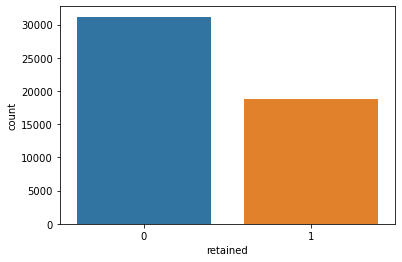

In [66]:
#Show distribution of target to check for inbalances
ax = sns.countplot(x=target, data=df2)

In [67]:
#Check for inbalance in y data.
unique, count = np.unique(y_train, return_counts=True)
y_train_dict = {k:v for(k,v) in zip(unique,count)}
y_train_dict

{0: 20865, 1: 12624}

**Logistic regression**

In [68]:
lr = LogisticRegression().fit(X_train, y_train.values.ravel())

In [69]:
#Predict on model and get accuracy score
predictions_lr = lr.predict(X_test)
print(accuracy_score(y_test, predictions_lr))

0.7001515610791149


In [70]:
confusion_matrix(y_test, predictions_lr)

array([[8554, 1763],
       [3183, 2995]], dtype=int64)

In [71]:
y_pred_acc = lr.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred_acc))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     10317
           1       0.63      0.48      0.55      6178

    accuracy                           0.70     16495
   macro avg       0.68      0.66      0.66     16495
weighted avg       0.69      0.70      0.69     16495



**Random forest**

In [115]:
#Create and base random forest model
rf1 = RandomForestClassifier()

In [117]:
#Fit base random forest model
rf1.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [118]:
#Predict on base random forest model and get accuracy score
predictions_rf1 = rf1.predict(X_test)
print(accuracy_score(y_test, predictions_rf1))

0.6200644641418211


In [119]:
#Get confusion matrix for base model
confusion_matrix(y_test, predictions_rf1)

array([[3978, 2200],
       [2515, 3717]], dtype=int64)

In [120]:
#Get classification report for base model
print(classification_report(y_test, predictions_rf1))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63      6178
           1       0.63      0.60      0.61      6232

    accuracy                           0.62     12410
   macro avg       0.62      0.62      0.62     12410
weighted avg       0.62      0.62      0.62     12410



In [75]:
#Create new random forest model and hypertune parameters for improved performance
rf2 = RandomForestClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf2, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
gridF = gridF.fit(X_train, y_train.values.ravel())

rf2 = gridF.best_estimator_

rf2.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 84.0min finished


RandomForestClassifier(max_depth=5, n_estimators=500)

In [76]:
#Create and fit new random forest model with ideal parameters
rf2 = RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=800)
rf2.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=800)

In [77]:
#Predict on parameter tuned model and get accuracy score
predictions_rf2 = rf2.predict(X_test)
print(accuracy_score(y_test, predictions_rf2))

0.700030312215823


In [78]:
#Get confusion matrix for parameter tuned model
confusion_matrix(y_test, predictions_rf2)

array([[8555, 1762],
       [3186, 2992]], dtype=int64)

In [ ]:
#Get classification report for parameter tuned model
print(classification_report(y_test, predictions_rf2))

**Undersampling**

Because the k-nearest neighbors algorithm does not perform well with inbalanced data, I will balance the data with the undersampling method before implementing it.

In [79]:
#Get length of the minority class
minority_class_len = len(df2[df2[target] == 1])
minority_class_len

18802

In [80]:
#Get indices for majority class
majority_class_indices = df2[df2[target]==0].index
majority_class_indices

Int64Index([    1,     2,     4,     6,     7,     8,     9,    10,    11,
               12,
            ...
            49980, 49981, 49982, 49983, 49984, 49985, 49986, 49987, 49989,
            49990],
           dtype='int64', length=31182)

In [81]:
#Randomly select instances from majority class to match length of midority class
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
len(random_majority_indices)

18802

In [82]:
#Get indices of minority class
minority_class_indices = df2[df2['retained']==1].index
minority_class_indices

Int64Index([    0,     3,     5,    13,    16,    17,    18,    19,    23,
               28,
            ...
            49963, 49964, 49966, 49971, 49972, 49973, 49975, 49976, 49988,
            49991],
           dtype='int64', length=18802)

In [83]:
#Concatenate minority and majority class indices
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [84]:
#Subset dataframe with new indices
under_sample = df2.loc[under_sample_indices]

<AxesSubplot:xlabel='retained', ylabel='count'>

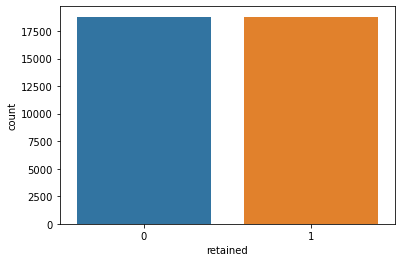

In [85]:
#Check for class balance
sns.countplot(x=target, data=under_sample)

In [86]:
#Create X and y variables and split into train and test sets
X = under_sample.loc[:, df2.columns!=target]
y = under_sample.loc[:, df2.columns==target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**K-nearest neighbor classifier**

In [87]:
#Create base knn model
knn = KNeighborsClassifier()

In [88]:
#Fit base knn model
knn = knn.fit(X_train, y_train.values.ravel())

In [89]:
#Predict on base knn model
predictions_knn = knn.predict(X_test)
print(accuracy_score(y_test, predictions_knn))

0.616116035455278


In [90]:
#Get classification report for base model
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      6178
           1       0.62      0.61      0.61      6232

    accuracy                           0.62     12410
   macro avg       0.62      0.62      0.62     12410
weighted avg       0.62      0.62      0.62     12410



In [91]:
#List Hyperparameters that we want to tune.
leaf_size = [10, 15, 25, 50]
n_neighbors = [15, 25, 50, 80, 200]
p=[1,2]
weights = ['uniform', 'distance']
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights = weights)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train.values.ravel())
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best algorithm:', best_model.best_estimator_.get_params()['weights'])

Best leaf_size: 10
Best p: 1
Best n_neighbors: 200
Best algorithm: uniform


In [92]:
#Create parameter tuned knn model
knn2 = KNeighborsClassifier(leaf_size=50, p=1, n_neighbors=80)

In [93]:
#Fit parameter tuned knn model
knn2 = knn2.fit(X_train, y_train.values.ravel())

In [94]:
#Predict on oarameter tuned model
predictions_knn2 = knn2.predict(X_test)
print(accuracy_score(y_test, predictions_knn2))

0.6601933924254634


In [95]:
#Get confusion matrix for parameter tuned model
confusion_matrix(y_test, predictions_knn2)

array([[4295, 1883],
       [2334, 3898]], dtype=int64)

In [97]:
print(classification_report(y_test, predictions_knn2))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67      6178
           1       0.67      0.63      0.65      6232

    accuracy                           0.66     12410
   macro avg       0.66      0.66      0.66     12410
weighted avg       0.66      0.66      0.66     12410



**ROC curve plot**

In [98]:
#Predict probability of all three models.
rf_probs = clf.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
knn_probs = knn2.predict_proba(X_test)

In [99]:
#Get only prediction scores
rf_probs = rf_probs[:, 1]
lr_probs = lr_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [100]:
#Get roc scores for each model
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

In [101]:
#Retrieve false positive and true positive rates of each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

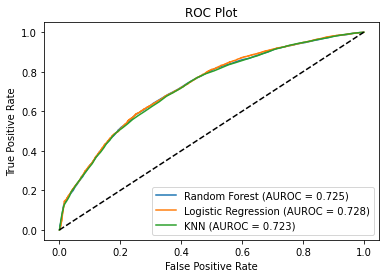

In [102]:
#Plot models.
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
#No skill line
plt.plot([0, 1], [0, 1], 'k--')
# Show plot
plt.show()

In [104]:
#Get feature importances from random forest model
important_features = pd.Series(data=rf.feature_importances_,index=X.columns)
print(important_features.sort_values(ascending=False,inplace=True))

None


In [112]:
#Show feature importances from random forest model
important_features.head(15)

city_King's Landing                  0.282608
phone_iPhone                         0.157185
phone_Android                        0.151642
ultimate_black_user_True             0.121889
ultimate_black_user_False            0.120816
city_Astapor                         0.099968
city_Winterfell                      0.038183
avg_dist_scaled                      0.007068
trips_in_first_thirty_days_scaled    0.003494
avg_surge_scaled                     0.003488
avg_rating_of_driver_scaled          0.003334
surge_pct_scaled                     0.003106
weekday_pct_scaled                   0.003068
avg_rating_by_driver_scaled          0.002806
phone_NA                             0.001346
dtype: float64

Ultimate could leverage the insights gained from my random forest model inseveral ways. It would appear the city of Winterfell is lagging behind the other cities in rider retention. To improve overall rider retention, Ultimate could focus marketing to riders in that region. Riders who did not provide phone information also seemed to be highly unlikely to be retained after siz months. Ultimate could search for opportunities to market their app to those who do not have either an iPhone or Android to improve rider tetention. 